<a href="https://colab.research.google.com/github/Abhi10699/recommendation-systems/blob/main/recommendation_system_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recommendation Systems
 
A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that provide suggestions for items that are most pertinent to a particular user.Typically, the suggestions refer to various decision-making processes, such as what product to purchase, what music to listen to, or what online news to read


#### Methods

- Collaborative Recommendations
- Content Based Recommendations
- Knowledge Based Recommendations
- Hybrid Recommendation Systems


## Collaborative Recommendation Systems

- It states that if a user A and user B share same interests in the past, they will have similar interest in future too.. Thus if User B gets some item X, theres a high probablity that User A will get it too.

- It relies on item ratings rather than its content

##### Approach

Pure collaborative approaches take a matrix of given user–item ratings as the
only input and typically produce the following types of output: (a) a (numerical)
prediction indicating to what degree the current user will like or dislike a certain
item and (b) a list of n recommended items. Such a top-N list should, of course,
not contain items that the current user has already bought.

#### User-Based Nearest Neighbor Recommendations

- One of the earliest method
- Given ta ratings database and the Id of the current cuse as an input, identify other users that had similar prefrences to thsoe of the active use in the past.
- For every product *P* that the active user has not seen yet, a prediction is computed based on the ratings for *p* made by the peer users.

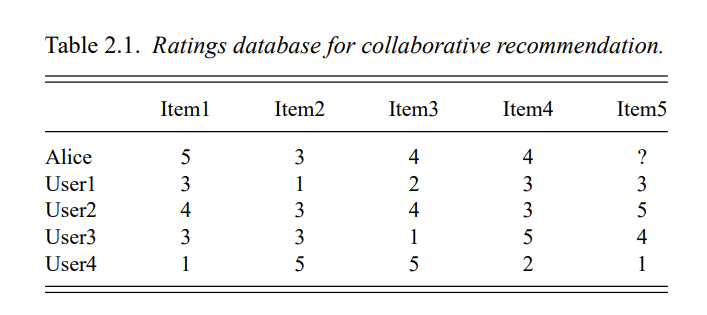


##### Code

In [90]:
import pandas as pd

ratings_dict = {
    "Alice": {
        "Item 1": 5,
        "Item 2": 3,
        "Item 3": 4,
        "Item 4": 4,
        "Item 5": None
    },
    "User1": {
        "Item 1": 3,
        "Item 2": 1,
        "Item 3": 2,
        "Item 4": 3,
        "Item 5": 3
    },
    "User2": {
        "Item 1": 4,
        "Item 2": 3,
        "Item 3": 4,
        "Item 4": 3,
        "Item 5": 5
    },
    "User3": {
        "Item 1": 3,
        "Item 2": 3,
        "Item 3": 1,
        "Item 4": 5,
        "Item 5": 4
    },
    "User4": {
        "Item 1": 1,
        "Item 2": 5,
        "Item 3": 5,
        "Item 4": 2,
        "Item 5": 1
    },
}

ratings_df = pd.DataFrame(ratings_dict)
ratings_df = ratings_df.transpose()

In [91]:
ratings_df

,Item 1,Item 2,Item 3,Item 4,Item 5
Alice,5.0,3.0,4.0,4.0,NaN
User1,3.0,1.0,2.0,3.0,3.0
User2,4.0,3.0,4.0,3.0,5.0
User3,3.0,3.0,1.0,5.0,4.0
User4,1.0,5.0,5.0,2.0,1.0


#### Determining Similarity 

*Pearson's Correlation Coefficient*

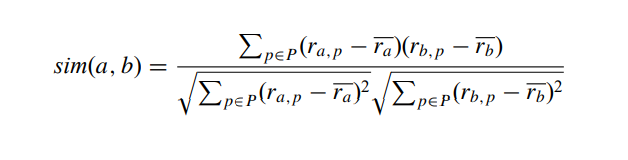

- The pearson correlation coefficient returns values from +1 (strong positive) to -1 (strong negative)

#### Calculating Similarity of Alice To User 1

**Step 1**: Get ratings for all products of User 1 and Alice

In [132]:
alice_ratings = ratings_df.loc["Alice"]
user1_ratings = ratings_df.loc["User1"]

(alice_ratings, user1_ratings)

(Item 1    5.0
 Item 2    3.0
 Item 3    4.0
 Item 4    4.0
 Item 5    NaN
 Name: Alice, dtype: float64, Item 1    3.0
 Item 2    1.0
 Item 3    2.0
 Item 4    3.0
 Item 5    3.0
 Name: User1, dtype: float64)

**Step 2** : Calculate Average Ratings for all items for Alice and User 1

In [93]:
alice_avg = alice_ratings.mean()
user1_avg = user1_ratings.mean()

(alice_avg, user1_avg)

(4.0, 2.4)

**Step 3**: Apply Pearson Coefficient Formula

In [94]:
alice_ratings_vals = alice_ratings.dropna().values
user1_ratings_vals = user1_ratings.fillna(0).values

(alice_ratings_vals, user1_ratings_vals)

(array([5., 3., 4., 4.]), array([3., 1., 2., 3., 3.]))

In [95]:
import math

product_sum = 0
alice_squared_sum = 0
user1_squared_sum = 0

for index, rating in enumerate(alice_ratings_vals):

  alice_avg_rating_diff = (rating - alice_avg)
  user1_avg_rating_diff = (user1_ratings_vals[index] - user1_avg);

  avg_rating_diff_product = alice_avg_rating_diff * user1_avg_rating_diff;
  product_sum = product_sum + avg_rating_diff_product

  alice_avg_rating_diff_sq = pow(alice_avg_rating_diff,2)
  user1_avg_rating_diff_sq = pow(user1_avg_rating_diff,2)

  alice_squared_sum = alice_squared_sum + alice_avg_rating_diff_sq
  user1_squared_sum = user1_squared_sum + user1_avg_rating_diff_sq



alice_squared_sum_sqrt = math.sqrt(alice_squared_sum);
user1_squared_sum_sqrt = math.sqrt(user1_squared_sum)

pearson_coeff = product_sum / (alice_squared_sum_sqrt * user1_squared_sum_sqrt)

pearson_coeff

0.839181358296689

**Converting To a Function**

In [127]:
from statistics import mean

def calculate_pearson_coefficient(ratings_a, ratings_b):
  a_avg = mean(ratings_a)
  b_avg = mean(ratings_b);

  product_sum = 0
  a_squared_sum = 0
  b_squared_sum = 0

  for index, rating in enumerate(ratings_a):

    a_avg_rating_diff = rating - a_avg
    b_avg_rating_diff = ratings_b[index] - b_avg

    avg_rating_diff_product = a_avg_rating_diff * b_avg_rating_diff
    product_sum = product_sum + avg_rating_diff_product

    a_avg_rating_diff_sq = pow(a_avg_rating_diff,2)
    b_avg_rating_diff_sq = pow(b_avg_rating_diff,2)

    a_squared_sum = a_squared_sum + a_avg_rating_diff_sq
    b_squared_sum = b_squared_sum + b_avg_rating_diff_sq

  a_squared_sum_sqrt = math.sqrt(a_squared_sum)
  b_squared_sum_sqrt = math.sqrt(b_squared_sum)

  pearson_coeff = product_sum / (a_squared_sum_sqrt * b_squared_sum_sqrt)
  return pearson_coeff

In [126]:
calculate_pearson_coefficient(alice_ratings_vals,user1_ratings_vals)

0.839181358296689

**Step 4**: Finding Alice's pearson coefficient with respect to Other Users

In [156]:
correlation_values = []
other_users = ratings_df.index.to_list()
other_users.remove("Alice")

for user in other_users:
  user_ratings = ratings_df.loc[user].fillna(0).values
  pearson_coeff = calculate_pearson_coefficient(alice_ratings_vals, user_ratings)
  correlation_values.append({"pearson_coeff":pearson_coeff,"user":user})

correlation_values

[{'pearson_coeff': 0.839181358296689, 'user': 'User1'},
 {'pearson_coeff': 0.6063390625908326, 'user': 'User2'},
 {'pearson_coeff': 0.0, 'user': 'User3'},
 {'pearson_coeff': -0.7680953726425683, 'user': 'User4'}]

**Step 4**: Find Neighbours

In [158]:
correlation_values.sort(reverse=True,key=lambda x: x["pearson_coeff"])
neighbors = correlation_values[:2]
neighbors

[{'pearson_coeff': 0.839181358296689, 'user': 'User1'},
 {'pearson_coeff': 0.6063390625908326, 'user': 'User2'}]

**Step 5**: Calculating rating of Item 5 of alice based on selected neighbors

In [175]:
top_sum = 0
bot_sum = 0

for neighbor in neighbors:
  neighbor_ratings = ratings_df.loc[neighbor['user']]
  neighbor_avg_ratings = mean(neighbor_ratings)
  neighbor_product_rating = neighbor_ratings["Item 5"]
  avg_rating_pearson_diff = neighbor["pearson_coeff"] * (neighbor_product_rating - neighbor_avg_ratings);
  top_sum = top_sum + avg_rating_pearson_diff
  bot_sum = bot_sum + neighbor["pearson_coeff"]


pred = alice_avg + (top_sum/bot_sum)
pred

4.851676442821287

Thus, predicted Item 5 Rating for Alice is 4.85 and so it can be recommended to alice

**Converting To Function**

In [181]:
def predict_rating(a_avg, neighbors,df,for_item):
  top_sum = 0
  bot_sum = 0

  for neighbor in neighbors:
    neighbor_ratings = df.loc[neighbor['user']]
    neighbor_avg_ratings = mean(neighbor_ratings)
    neighbor_product_rating = neighbor_ratings[for_item]
    avg_rating_pearson_diff = neighbor["pearson_coeff"] * (neighbor_product_rating - neighbor_avg_ratings);
    top_sum = top_sum + avg_rating_pearson_diff
    bot_sum = bot_sum + neighbor["pearson_coeff"]


  pred = a_avg + (top_sum/bot_sum)
  return pred

In [182]:
predict_rating(alice_avg, neighbors, ratings_df,"Item 5")

4.851676442821287